# Pandas Basics

A high-level overview of the [Pandas](https://pandas.pydata.org) library. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

## Reading in DataFrames from Files

Pandas has a number of very useful file reading tools. You can see them enumerated by typing "pd.re" and pressing tab. We'll be using read_csv today. 

In [14]:
elections = pd.read_csv("elections.csv")
elections # if we end a cell with an expression or variable name, the result will print

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


As a simple indexing example, consider the code below, which returns the first 5 rows of the DataFrame.

In [15]:
elections.loc[0:4]

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


We can also use the head command to return only a few rows of a dataframe.

In [16]:
elections.set_index("Year")

,Candidate,Party,Popular vote,Result,%
Year,,,,,
1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
1828,Andrew Jackson,Democratic,642806,win,56.203927
1828,John Quincy Adams,National Republican,500897,loss,43.796073
1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...
2016,Jill Stein,Green,1457226,loss,1.073699
2020,Joseph Biden,Democratic,81268924,win,51.311515
2020,Donald Trump,Republican,74216154,loss,46.858542


Or the tail command to get the last so many rows.

In [17]:
elections.tail(5)

,Year,Candidate,Party,Popular vote,Result,%
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979
181,2020,Howard Hawkins,Green,405035,loss,0.255731


If we want a subset of the columns, we can also use loc just to ask for those.

In [19]:
elections.loc[0:4, "Year":"Party"]

,Year,Candidate,Party
0,1824,Andrew Jackson,Democratic-Republican
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican
4,1832,Andrew Jackson,Democratic


In [20]:
elections[1]

KeyError: 1

In [21]:
elections[1:2]

,Year,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878


### loc

loc selects items by row and column label.

In [22]:
elections.loc[[87, 25, 179], ["Year", "Candidate", "Result"]]

,Year,Candidate,Result
87,1932,Herbert Hoover,loss
25,1860,John C. Breckinridge,loss
179,2020,Donald Trump,loss


In [23]:
elections.loc[[87, 25, 179], "Popular vote":"%"]

,Popular vote,Result,%
87,15761254,loss,39.830594
25,848019,loss,18.138998
179,74216154,loss,46.858542


In [24]:
elections.loc[[87, 25, 179], "Popular vote"]

87     15761254
25       848019
179    74216154
Name: Popular vote, dtype: int64

In [25]:
elections.loc[:, ["Year", "Candidate", "Result"]]

,Year,Candidate,Result
0,1824,Andrew Jackson,loss
1,1824,John Quincy Adams,win
2,1828,Andrew Jackson,win
3,1828,John Quincy Adams,loss
4,1832,Andrew Jackson,win
...,...,...,...
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss


### iloc

iloc selects items by row and column number.

In [26]:
elections.iloc[[1, 2, 3], [0, 1, 2]]

,Year,Candidate,Party
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican


In [27]:
elections.iloc[[1, 2, 3], 0:2]

,Year,Candidate
1,1824,John Quincy Adams
2,1828,Andrew Jackson
3,1828,John Quincy Adams


In [28]:
elections.iloc[[1, 2, 3], 1]

1    John Quincy Adams
2       Andrew Jackson
3    John Quincy Adams
Name: Candidate, dtype: object

In [29]:
elections.iloc[:, [0, 1, 4]]

,Year,Candidate,Result
0,1824,Andrew Jackson,loss
1,1824,John Quincy Adams,win
2,1828,Andrew Jackson,win
3,1828,John Quincy Adams,loss
4,1832,Andrew Jackson,win
...,...,...,...
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss


### []

We could technically do anything we want using `loc` or `iloc`. However, in practice, the `[]` operator is often used instead to yield more concise code.

`[]` is a bit trickier to understand than `loc` or `iloc`, but it does essentially the same thing.

If we provide a slice of row numbers, we get the numbered rows.

In [30]:
elections[3:7]

,Year,Candidate,Party,Popular vote,Result,%
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
5,1832,Henry Clay,National Republican,484205,loss,37.603628
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583


If we provide a list of column names, we get the listed columns.

In [31]:
elections[["Year", "Candidate", "Result"]].tail(5)

,Year,Candidate,Result
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss
181,2020,Howard Hawkins,loss


And if we provide a single column name we get back just that column.

In [32]:
elections["Candidate"].tail(5)

177        Jill Stein
178      Joseph Biden
179      Donald Trump
180      Jo Jorgensen
181    Howard Hawkins
Name: Candidate, dtype: object

In [9]:
weird = pd.DataFrame({
    1:["topdog","botdog"], 
    "1":["topcat","botcat"]
})
weird

,1,1
0,topdog,topcat
1,botdog,botcat


In [10]:
weird[1] #try to predict the output

0    topdog
1    botdog
Name: 1, dtype: object

In [11]:
weird[1:2]

,1,1
1,botdog,botcat


In [12]:
weird["1"] #try to predict the output

0    topcat
1    botcat
Name: 1, dtype: object

In [13]:
weird[1:] #try to predict the output

,1,1
1,botdog,botcat


## Pandas Datastructures: DataFrames, Series, and Indices

In [33]:
type(elections)

pandas.core.frame.DataFrame

In [34]:
type(elections["Candidate"])

pandas.core.series.Series

In [35]:
mottos = pd.read_csv("mottos.csv", index_col = "State")
mottos.loc["Alabama":"California"]

,Motto,Translation,Language,Date Adopted
State,,,,
Alabama,Audemus jura nostra defendere,We dare defend our rights!,Latin,1923
Alaska,North to the future,—,English,1967
Arizona,Ditat Deus,God enriches,Latin,1863
Arkansas,Regnat populus,The people rule,Latin,1907
California,Eureka (Εὕρηκα),I have found it,Greek,1849


In [36]:
elections["Candidate"].tail(5).to_frame()

,Candidate
177,Jill Stein
178,Joseph Biden
179,Donald Trump
180,Jo Jorgensen
181,Howard Hawkins


In [37]:
elections[["Candidate"]].tail(5)

,Candidate
177,Jill Stein
178,Joseph Biden
179,Donald Trump
180,Jo Jorgensen
181,Howard Hawkins


In [38]:
mottos.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [39]:
mottos.columns

Index(['Motto', 'Translation', 'Language', 'Date Adopted'], dtype='object')

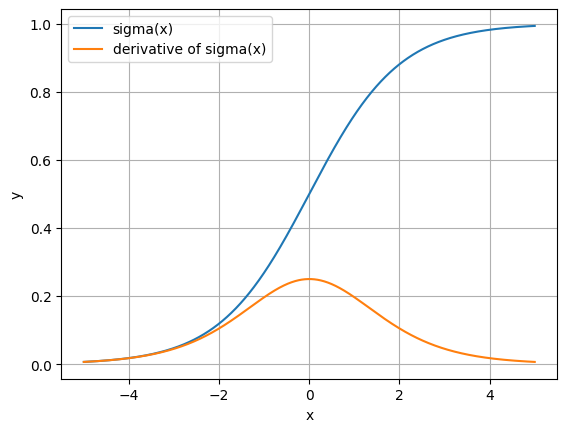

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# create 1000 equally spaced points between -10 and 10
x = np.linspace(-5, 5, 1000)

# calculate the y value for each element of the x vector
y_1 = (1 + np.exp(-x))**-1
y_2 = y_1 * (1 - y_1)

fig, ax = plt.subplots()
ax.plot(x, y_1)
ax.plot(x, y_2)
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(["sigma(x)", "derivative of sigma(x)"])

In [14]:
if 5 in [1,2,3,]:
    print("5 is in the list")